In [1]:
import numpy as np 
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from wordcloud import STOPWORDS
import re

In [2]:
df_train=pd.read_csv("C:/Users/vedpr/Downloads/Notebooks/BERT/Corona_NLP_train.csv",encoding = "ISO-8859-1", engine='python')
df_test=pd.read_csv("C:/Users/vedpr/Downloads/Notebooks/BERT/Corona_NLP_test.csv",encoding = "ISO-8859-1", engine='python')

In [3]:
df_train.shape

(41157, 6)

In [4]:
df_test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [5]:
df=df_train.append(df_test)

In [6]:
df.groupby('Sentiment').describe()

UserName                                             \
                      count          mean           std  min       25%   
Sentiment                                                                
Extremely Negative   6073.0  20932.917504  12957.616546  1.0   9768.00   
Extremely Positive   7223.0  23125.802852  12996.528467  3.0  11831.50   
Negative            10958.0  21809.559317  13007.373025  4.0  10448.50   
Neutral              8332.0  23285.213994  12940.044332  5.0  12051.75   
Positive            12369.0  22906.755114  12882.859816  2.0  11806.00   

                                               ScreenName                \
                        50%       75%      max      count          mean   
Sentiment                                                                 
Extremely Negative  19657.0  31976.00  44952.0     6073.0  65884.917504   
Extremely Positive  23565.0  34441.50  44950.0     7223.0  68077.802852   
Negative            21588.5  32953.75  44955.0    10958.0  66761.559317   
Neutral             23644.5  34503.50  44954.0     8332.0  68237.213994   
Positive            23101.0  34066.00  44953.0    12369.0  67858.755114   

                                                                        \
                             std      min       25%      50%       75%   
Sentiment                                                                
Extremely Negative  12957.616546  44953.0  54720.00  64609.0  76928.00   
Extremely Positive  12996.528467  44955.0  56783.50  68517.0  79393.50   
Negative            13007.373025  44956.0  55400.50  66540.5  77905.75   
Neutral             12940.044332  44957.0  57003.75  68596.5  79455.50   
Positive            12882.859816  44954.0  56758.00  68053.0  79018.00   

                             
                        max  
Sentiment                    
Extremely Negative  89904.0  
Extremely Positive  89902.0  
Negative            89907.0  
Neutral             89906.0  
Positive            89905.0

In [7]:
df=df[(df['Sentiment']=='Extremely Negative') | (df['Sentiment']== 'Extremely Positive')]

In [8]:
df.groupby('Sentiment').describe()

UserName                                            \
                      count          mean           std  min      25%   
Sentiment                                                               
Extremely Negative   6073.0  20932.917504  12957.616546  1.0   9768.0   
Extremely Positive   7223.0  23125.802852  12996.528467  3.0  11831.5   

                                              ScreenName                \
                        50%      75%      max      count          mean   
Sentiment                                                                
Extremely Negative  19657.0  31976.0  44952.0     6073.0  65884.917504   
Extremely Positive  23565.0  34441.5  44950.0     7223.0  68077.802852   

                                                                               
                             std      min      25%      50%      75%      max  
Sentiment                                                                      
Extremely Negative  12957.616546  44953.0  54720.0  64609.0  76928.0  89904.0  
Extremely Positive  12996.528467  44955.0  56783.5  68517.0  79393.5  89902.0

In [9]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
11,3810,48762,"Pitt Meadows, BC, Canada",16-03-2020,"Due to the Covid-19 situation, we have increas...",Extremely Positive
12,3811,48763,Horningsea,16-03-2020,#horningsea is a caring community. LetÂs ALL ...,Extremely Positive
18,3817,48769,North America,16-03-2020,"Amazon Glitch Stymies Whole Foods, Fresh Groce...",Extremely Positive
20,3819,48771,southampton soxx xxx,16-03-2020,with 100 nations inficted with covid 19 th...,Extremely Negative


In [10]:
df.drop(['UserName','ScreenName','Location','TweetAt'],axis=1,inplace=True)

In [11]:
df.head()

,OriginalTweet,Sentiment
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative
11,"Due to the Covid-19 situation, we have increas...",Extremely Positive
12,#horningsea is a caring community. LetÂs ALL ...,Extremely Positive
18,"Amazon Glitch Stymies Whole Foods, Fresh Groce...",Extremely Positive
20,with 100 nations inficted with covid 19 th...,Extremely Negative


In [12]:
df['stop_word_count'] = df['OriginalTweet'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

In [13]:
df.head()

,OriginalTweet,Sentiment,stop_word_count
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,17
11,"Due to the Covid-19 situation, we have increas...",Extremely Positive,17
12,#horningsea is a caring community. LetÂs ALL ...,Extremely Positive,20
18,"Amazon Glitch Stymies Whole Foods, Fresh Groce...",Extremely Positive,11
20,with 100 nations inficted with covid 19 th...,Extremely Negative,13


In [14]:
def clean(tweets):
    tweets=re.sub('@[^\s]+',' ',tweets)
    tweets=re.sub(r'http\S+', ' ', tweets)
    tweets=re.sub('[^A-Za-z0-9]+', ' ', tweets)
    return tweets

In [15]:
df['text_cleaned'] = df['OriginalTweet'].apply(lambda s : clean(s))

In [16]:
df.head()

,OriginalTweet,Sentiment,stop_word_count,text_cleaned
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,17,Me ready to go at supermarket during the COVID...
11,"Due to the Covid-19 situation, we have increas...",Extremely Positive,17,Due to the Covid 19 situation we have increase...
12,#horningsea is a caring community. LetÂs ALL ...,Extremely Positive,20,horningsea is a caring community Let s ALL lo...
18,"Amazon Glitch Stymies Whole Foods, Fresh Groce...",Extremely Positive,11,Amazon Glitch Stymies Whole Foods Fresh Grocer...
20,with 100 nations inficted with covid 19 th...,Extremely Negative,13,with 100 nations inficted with covid 19 the wo...


In [17]:
df['text_cleaned'][0]

'TRENDING New Yorkers encounter empty supermarket shelves pictured Wegmans in Brooklyn sold out online grocers FoodKick MaxDelivery as coronavirus fearing shoppers stock up '

In [18]:
df.groupby('Sentiment').head()

,OriginalTweet,Sentiment,stop_word_count,text_cleaned
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,17,Me ready to go at supermarket during the COVID...
11,"Due to the Covid-19 situation, we have increas...",Extremely Positive,17,Due to the Covid 19 situation we have increase...
12,#horningsea is a caring community. LetÂs ALL ...,Extremely Positive,20,horningsea is a caring community Let s ALL lo...
18,"Amazon Glitch Stymies Whole Foods, Fresh Groce...",Extremely Positive,11,Amazon Glitch Stymies Whole Foods Fresh Grocer...
20,with 100 nations inficted with covid 19 th...,Extremely Negative,13,with 100 nations inficted with covid 19 the wo...
22,We have AMAZING CHEAP DEALS! FOR THE #COVID201...,Extremely Positive,8,We have AMAZING CHEAP DEALS FOR THE COVID2019 ...
23,We have AMAZING CHEAP DEALS! FOR THE #COVID201...,Extremely Positive,8,We have AMAZING CHEAP DEALS FOR THE COVID2019 ...
27,This morning I tested positive for Covid 19. I...,Extremely Negative,26,This morning I tested positive for Covid 19 I ...
29,@7SealsOfTheEnd Soon with dwindling supplies u...,Extremely Negative,13,Soon with dwindling supplies unlawful Panicky...
42,CHECK VIDEO ?? https://t.co/1ksn9Brl02 ??No fo...,Extremely Negative,4,CHECK VIDEO No food in USA market due to coron...


In [19]:
df.Sentiment.value_counts()

Extremely Positive    7223
Extremely Negative    6073
Name: Sentiment, dtype: int64

In [20]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  

In [21]:
df['Sentiment']=label_encoder.fit_transform(df['Sentiment'])

In [22]:
df.head()

,OriginalTweet,Sentiment,stop_word_count,text_cleaned
4,"Me, ready to go at supermarket during the #COV...",0,17,Me ready to go at supermarket during the COVID...
11,"Due to the Covid-19 situation, we have increas...",1,17,Due to the Covid 19 situation we have increase...
12,#horningsea is a caring community. LetÂs ALL ...,1,20,horningsea is a caring community Let s ALL lo...
18,"Amazon Glitch Stymies Whole Foods, Fresh Groce...",1,11,Amazon Glitch Stymies Whole Foods Fresh Grocer...
20,with 100 nations inficted with covid 19 th...,0,13,with 100 nations inficted with covid 19 the wo...


In [23]:
df.drop(['OriginalTweet','stop_word_count'],axis=1, inplace=True)

In [24]:
df.head()

,Sentiment,text_cleaned
4,0,Me ready to go at supermarket during the COVID...
11,1,Due to the Covid 19 situation we have increase...
12,1,horningsea is a caring community Let s ALL lo...
18,1,Amazon Glitch Stymies Whole Foods Fresh Grocer...
20,0,with 100 nations inficted with covid 19 the wo...


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text_cleaned'],df['Sentiment'], stratify=df['Sentiment'])

In [26]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [27]:
def get_sentence_embeding(sentences):
    preprocessed_text = bert_preprocess(sentences)
    return bert_encoder(preprocessed_text)['pooled_output']

get_sentence_embeding([
    "500$ discount. hurry up", 
    "Bhavin, are you up for a volleybal game tomorrow?"]
)

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.8435169 , -0.5132728 , -0.8884575 , ..., -0.74748886,
        -0.7531474 ,  0.91964495],
       [-0.8720836 , -0.5054398 , -0.94446677, ..., -0.8584752 ,
        -0.71745354,  0.8808298 ]], dtype=float32)>

In [28]:
e = get_sentence_embeding([
    "banana", 
    "grapes",
    "mango",
    "jeff bezos",
    "elon musk",
    "bill gates"
]
)

In [29]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([e[0]],[e[1]])

array([[0.9911088]], dtype=float32)

In [30]:
cosine_similarity([e[0]],[e[3]])

array([[0.8470379]], dtype=float32)

In [31]:
cosine_similarity([e[3]],[e[4]])

array([[0.98720354]], dtype=float32)

In [32]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [33]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text (InputLayer)               [(None,)]            0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        {'input_mask': (None 0           text[0][0]                       
__________________________________________________________________________________________________
keras_layer_1 (KerasLayer)      {'default': (None, 7 109482241   keras_layer[0][0]                
                                                                 keras_layer[0][1]                
                                                                 keras_layer[0][2]                
______________________________________________________________________________________________

In [34]:
len(X_train)

9972

In [35]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [36]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
312/312 [==============================] - 2054s 7s/step - loss: 0.6451 - accuracy: 0.6228 - precision: 0.6332 - recall: 0.7266
Epoch 2/10
312/312 [==============================] - 1665s 5s/step - loss: 0.5838 - accuracy: 0.6942 - precision: 0.6990 - recall: 0.7678
Epoch 3/10
312/312 [==============================] - 1500s 5s/step - loss: 0.5592 - accuracy: 0.7140 - precision: 0.7234 - recall: 0.7667
Epoch 4/10
312/312 [==============================] - 1478s 5s/step - loss: 0.5382 - accuracy: 0.7306 - precision: 0.7416 - recall: 0.7737
Epoch 5/10
312/312 [==============================] - 1458s 5s/step - loss: 0.5299 - accuracy: 0.7364 - precision: 0.7507 - recall: 0.7705
Epoch 6/10
312/312 [==============================] - 1448s 5s/step - loss: 0.5203 - accuracy: 0.7445 - precision: 0.7582 - recall: 0.7776
Epoch 7/10
312/312 [==============================] - 1444s 5s/step - loss: 0.5119 - accuracy: 0.7503 - precision: 0.7627 - recall: 0.7844
Epoch 8/10
312/312 [=======

In [37]:
model.evaluate(X_test, y_test)

104/104 [==============================] - 471s 5s/step - loss: 0.4877 - accuracy: 0.7608 - precision: 0.7305 - recall: 0.8870


[0.48765048384666443,
 0.7608303427696228,
 0.730506181716919,
 0.8870431780815125]

In [38]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

In [39]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([1, 1, 0, ..., 1, 0, 1])

In [40]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm 

array([[ 927,  591],
       [ 204, 1602]], dtype=int64)

Text(33.0, 0.5, 'Truth')

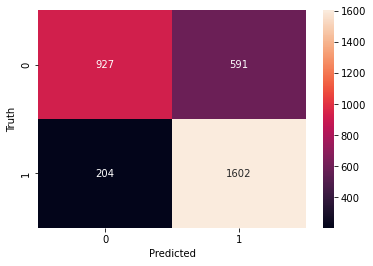

In [41]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')